In [76]:
#Assignment 4: Tests of correlation using the scipy package with citibike data.
#Pearson’s test
#Spearman’s test
#K-S test
#Use: age of bikers for 2 genders. State your result in 
#words in terms of the Null Hypothesis
#You must state the Null Hypothesis, according to what you know about the test 
#and the scipy.stats package documentation for three scipy.stats function, 
#corresponding to the three tests.
#You must put the caluclated statistics and the p-value in the context
#of null hypothesis rejection in each case.

#Solution is includes data from February 2015 : We will assume there is no difference or it is same between population proportion
#This makes the null hypothesis a two tail test so as long as there is an extreme
#value on either side beyond 2sigma alpha=0.05 null hypo will not hold

#Ho: Distribution of ages same or lower for men riders than women

#H1: The citybike men riders are greater than women riders

#Ho - H1 >= 0
#Ho - H1 < 0 


from __future__  import print_function, division
import pylab as pl
import pandas as pd
import numpy as np
import os
import zipfile
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('ggplot')

%pylab inline

datestring = '201502'
!curl -O "https://s3.amazonaws.com/tripdata/{datestring}-citibike-tripdata.zip"

zf = zipfile.ZipFile(datestring+'-citibike-tripdata.zip')
df = pd.read_csv(zf.open(datestring+'-citibike-tripdata.csv'))

df['date'] = pd.to_datetime(df['starttime'])
df.head()

Populating the interactive namespace from numpy and matplotlib
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 4708k  100 4708k    0     0  10.3M      0 --:--:-- --:--:-- --:--:-- 16.9M


,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,date
0,801,2/1/2015 0:00,2/1/2015 0:14,521,8 Ave & W 31 St,40.750450,-73.994811,423,W 54 St & 9 Ave,40.765849,-73.986905,17131,Subscriber,1978.0,2,2015-02-01 00:00:00
1,379,2/1/2015 0:00,2/1/2015 0:07,497,E 17 St & Broadway,40.737050,-73.990093,504,1 Ave & E 15 St,40.732219,-73.981656,21289,Subscriber,1993.0,1,2015-02-01 00:00:00
2,2474,2/1/2015 0:01,2/1/2015 0:42,281,Grand Army Plaza & Central Park S,40.764397,-73.973715,127,Barrow St & Hudson St,40.731724,-74.006744,18903,Subscriber,1969.0,2,2015-02-01 00:01:00
3,818,2/1/2015 0:01,2/1/2015 0:15,2004,6 Ave & Broome St,40.724399,-74.004704,505,6 Ave & W 33 St,40.749013,-73.988484,21044,Subscriber,1985.0,2,2015-02-01 00:01:00
4,544,2/1/2015 0:01,2/1/2015 0:10,323,Lawrence St & Willoughby St,40.692362,-73.986317,83,Atlantic Ave & Fort Greene Pl,40.683826,-73.976323,19868,Subscriber,1957.0,1,2015-02-01 00:01:00


In [77]:
df.columns

Index([u'tripduration', u'starttime', u'stoptime', u'start station id',
       u'start station name', u'start station latitude',
       u'start station longitude', u'end station id', u'end station name',
       u'end station latitude', u'end station longitude', u'bikeid',
       u'usertype', u'birth year', u'gender', u'date'],
      dtype='object')

In [78]:
df.drop(['start station id', 'start station name', 'start station latitude', 
         'start station longitude', 'end station id', 'end station name','end station latitude', 'end station longitude', 
         'bikeid',], axis=1, inplace=True)

In [79]:
#df is the dataframe where the content of the csv file is stored
#df['ageM'] = 201502 - df['birth year'][(df['usertype'] == 'Subscriber') & (df['gender'] == 1)]
#df['ageF'] = 201502 - df['birth year'][(df['usertype'] == 'Subscriber') & (df['gender'] == 2)]

In [80]:
df.head()

,tripduration,starttime,stoptime,usertype,birth year,gender,date
0,801,2/1/2015 0:00,2/1/2015 0:14,Subscriber,1978.0,2,2015-02-01 00:00:00
1,379,2/1/2015 0:00,2/1/2015 0:07,Subscriber,1993.0,1,2015-02-01 00:00:00
2,2474,2/1/2015 0:01,2/1/2015 0:42,Subscriber,1969.0,2,2015-02-01 00:01:00
3,818,2/1/2015 0:01,2/1/2015 0:15,Subscriber,1985.0,2,2015-02-01 00:01:00
4,544,2/1/2015 0:01,2/1/2015 0:10,Subscriber,1957.0,1,2015-02-01 00:01:00


In [81]:
#df is the dataframe where the content of the csv file is stored
df['ageM'] = 2015 - df['birth year'][(df['usertype'] == 'Subscriber') & (df['gender'] == 1)]
df['ageF'] = 2015 - df['birth year'][(df['usertype'] == 'Subscriber') & (df['gender'] == 2)]
#df['date'] = 2015 - df['starttime'][(df['usertype'] == 'Subscriber') & (df['gender'] == 3)]

In [82]:
df.head()

,tripduration,starttime,stoptime,usertype,birth year,gender,date,ageM,ageF
0,801,2/1/2015 0:00,2/1/2015 0:14,Subscriber,1978.0,2,2015-02-01 00:00:00,NaN,37.0
1,379,2/1/2015 0:00,2/1/2015 0:07,Subscriber,1993.0,1,2015-02-01 00:00:00,22.0,NaN
2,2474,2/1/2015 0:01,2/1/2015 0:42,Subscriber,1969.0,2,2015-02-01 00:01:00,NaN,46.0
3,818,2/1/2015 0:01,2/1/2015 0:15,Subscriber,1985.0,2,2015-02-01 00:01:00,NaN,30.0
4,544,2/1/2015 0:01,2/1/2015 0:10,Subscriber,1957.0,1,2015-02-01 00:01:00,58.0,NaN


In [83]:
#df.describe()

In [84]:
#Dropping NaN values.....NaN still appear? 
df['ageM'].dropna(inplace = True)
df['ageF'].dropna(inplace = True)
#df['date'].dropna(inplace = True)
df.head()

,tripduration,starttime,stoptime,usertype,birth year,gender,date,ageM,ageF
0,801,2/1/2015 0:00,2/1/2015 0:14,Subscriber,1978.0,2,2015-02-01 00:00:00,NaN,37.0
1,379,2/1/2015 0:00,2/1/2015 0:07,Subscriber,1993.0,1,2015-02-01 00:00:00,22.0,NaN
2,2474,2/1/2015 0:01,2/1/2015 0:42,Subscriber,1969.0,2,2015-02-01 00:01:00,NaN,46.0
3,818,2/1/2015 0:01,2/1/2015 0:15,Subscriber,1985.0,2,2015-02-01 00:01:00,NaN,30.0
4,544,2/1/2015 0:01,2/1/2015 0:10,Subscriber,1957.0,1,2015-02-01 00:01:00,58.0,NaN


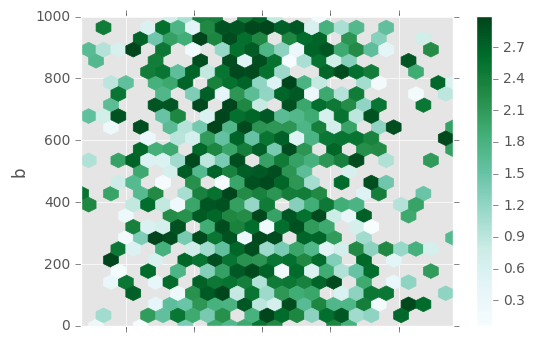

In [87]:
a = df.ageM
b = df.ageF

df = pd.DataFrame(np.random.randn(1000, 2), columns=['a', 'b'])

df['b'] = df['b'] + np.arange(1000)

df['z'] = np.random.uniform(0, 3, 1000)

df.plot.hexbin(x='a', y='b', C='z', reduce_C_function=np.max,
        gridsize=25)



#Source: http://pandas.pydata.org/pandas-docs/version/0.18.1/visualization.html
#Hexplot for men and women ages for citibike